# __Data Import__

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# __Data Visualisation__

Text(0.5, 1.0, 'Boxplot showing Median value of owner-occupied homes')

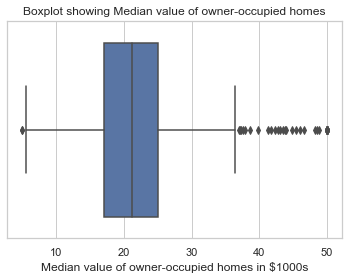

In [9]:
# boxplot for median value of occupied homes
bx_med = sns.boxplot(x = 'MEDV', data=boston_df)
bx_med.set_xlabel('Median value of owner-occupied homes in $1000s')
bx_med.set_title('Boxplot showing Median value of owner-occupied homes')

Shows that there are many upper end outliers. However, the median is around $20,000 with the IQR being around $7,500.

Text(0.5, 1.0, 'Barplot to show the effect Charles River bound on Median home value')

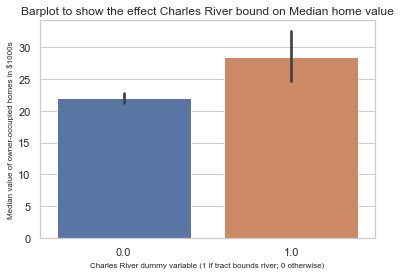

In [12]:
# bar plot for Charles River Variable
sns.set(style='whitegrid')
bp_chas = sns.barplot(x = 'CHAS', y = 'MEDV', data=boston_df)
bp_chas.set_xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)', size=8)
bp_chas.set_ylabel('Median value of owner-occupied homes in $1000s', size=8)
bp_chas.set_title('Barplot to show the effect Charles River bound on Median home value')


This shows a clear increase in median value when the home is within the Charles River tract.

In [13]:
#Discretize age into 3 groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'Boxplot showing Median value of owner-occupied homes vs age group')

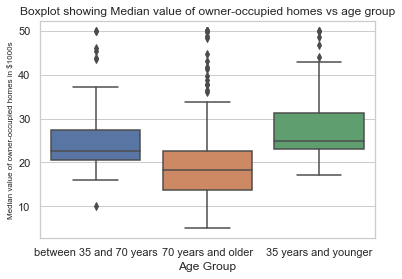

In [14]:
#boxplot for MEDV vs AGE
bx_age = sns.boxplot(x = 'age_group', y = 'MEDV', data=boston_df)
bx_age.set_xlabel('Age Group')
bx_age.set_ylabel('Median value of owner-occupied homes in $1000s', size=8)
bx_age.set_title('Boxplot showing Median value of owner-occupied homes vs age group')


This shows us that the older you get the less your house tends to be in value. As the median decreases as the age groups increase. However, the oldest age group also has the highest upper end outliers.

Text(0.5, 1.0, 'Scatterplot to show relationship between Nitric oxide conc and proportion of non-retail business acres per town')

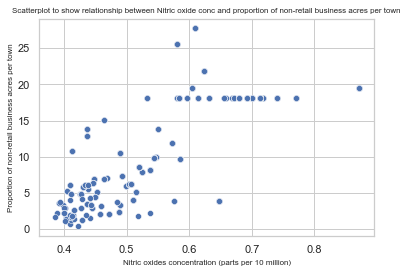

In [15]:
# Scatterplot to show relationship between Nitric oxide conc and proportion of non-retail business acres per town
sp_nit = sns.scatterplot(x = 'NOX', y = 'INDUS', data=boston_df)
sp_nit.set_xlabel('Nitric oxides concentration (parts per 10 million)', size=8)
sp_nit.set_ylabel('Proportion of non-retail business acres per town', size=8)
sp_nit.set_title('Scatterplot to show relationship between Nitric oxide conc and proportion of non-retail business acres per town', size=8)

The scatterplot shows a roughly positive correlation between the levels of nitric oxide and non-retail business. This means that more nitric oxide migh have a positive effect on non-retail business.

Text(0.5, 1.0, 'Histogram for pupil to teacher ratio variable')

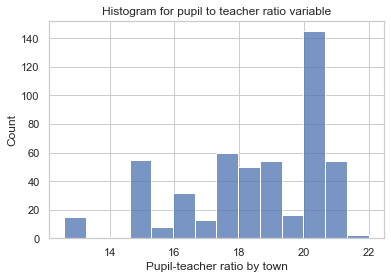

In [16]:
# Histogram for pupil to teacher ratio variable
hist_rat = sns.histplot(x='PTRATIO', data=boston_df)
hist_rat.set_xlabel('Pupil-teacher ratio by town')
hist_rat.set_title('Histogram for pupil to teacher ratio variable')

This shows us that there is a lot of variation with pupil-teacher ratios among the different towns studied with a range from 0 all the up to over 140.

# __Hypothesis Testing__

### Is there a significant difference in median value of houses bounded by the Charles river or not?

__Null Hypothesis__: no significant difference in median values of houses bounded by Charles River

__Alternate Hypothesis__: there is a significant difference in median values of houses bounded by Charles River


In [21]:
# T test for independent sample
# first check for equal variance
scipy.stats.levene(boston_df['CHAS'], boston_df['MEDV'], center='mean')


LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

Levene test result has p-value below 0.05, so equality of variances can be assumed

In [22]:
scipy.stats.ttest_ind(boston_df['CHAS'], boston_df['MEDV'], equal_var=True)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

This test output shows us the the t statistic being less than our alpha = 0.05, therefore we reject null hypothesis and say that there is in fact a significant difference in median value of houses bounded by Charles River or not.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

__Null Hypothesis__: there is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

__Alternate Hypothesis__: there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [20]:
# ANOVA test, using age_group sections from above
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


The results of the ANOVA test show us that at the alpha = 0.05 level, we reject the null hypothesis and so there is a significant difference in at least one of the age groups.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

__Null Hypothesis__: there is no significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town

__Alternate Hypothesis__: there is a significant relaionship between nitric oxide concentrations and proportion of non-retail business acres per town

In [23]:
# Pearson correlation test
X = boston_df['NOX']
y = boston_df['INDUS']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predict = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           7.91e-98
Time:                        02:15:37   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The pearson correlation results show that the p-value is below the value of alpha = 0.05. Therefore, we reject null hypothesis and so, there is a significant relationship between nitric oxide and non-retail business.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [24]:
# Use regression results to find the impact
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predict = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 28 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        02:20:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysing the results given, we can see that the coefficient of the DIS variable is 1.0916, which means that the impact of increasing the DIS variable by 1 is that the median value of a home increases by $1091.60.